# Word embedding
@author: huni

In [3]:
import os, re, datetime, pickle
from sys import platform
from tqdm import tqdm

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import plotly

BASE_DIR = os.getcwd() ; print('Current WD: ', BASE_DIR)
if 'win32' in platform: # for window
    from eunjeon import Mecab
    plt.rc("font",family="Malgun Gothic")
elif 'darwin' in platform: # for mac
    from konlpy.tag import Mecab
    plt.rc('font', family='AppleGothic') 
    font_path= '/System/Library/Fonts/Supplemental/AppleGothic.ttf'


pkl_obj = open(os.path.join(BASE_DIR, 'RESULT', '220305_2021 STELA 발제자별.pkl'), 'rb')
res = pickle.load(pkl_obj)
res.keys()

Current WD:  /Users/huni/Proj/data_preprocessing/crawler_notion


dict_keys(['UNGGI LEE', 'Brida Choi', '\xad송유경', 'Juno Hwang', 'H\nHaewon Jung', '성지훈 \xad', '이재용 \xad', 'Juhong Eom', 'H\nHae Rin Lee', '원지영(교육대학원 교육학과)', 'hyunjee Kwon', '전영훈', 'Y\nYoonhee Ham', '박\n박용현 / 학생 / 물리교육과 \xad', '백\n백수진', '임은선 \xad', '박새록(사범대학 교육공학과) \xad', '이\n이홍규'])

In [4]:
tagger = Mecab()
print('문제가 될만한 단어 사용자사전 추가 전에 테스트')
print(tagger.nouns('학습분석'))
print(tagger.nouns('문항반응이론'))
print(tagger.nouns('요인분석'))
print(tagger.nouns('데이터'))
print(tagger.morphs('learning analytics')) ## morphs를 써야 다 분리됨
print(tagger.nouns('학습설계'))
print(tagger.nouns('학습디자인'))


문제가 될만한 단어 사용자사전 추가 전에 테스트
['학습', '분석']
['문항반응이론']
['요인', '분석']
['데이터']
['learning', 'analytics']
['학습', '설계']
['학습', '디자인']


In [5]:
res['성지훈 \xad']

'1. \'언어\' 2. NLP 2.1 The words 2.1.1 Linguistic Inquiry Word Count 2.1.2 n-gram 2.2 The Features of the Words 2.2.1 Latent Semantic Analytic 2.2.2 Coh - Metrix 2.2.3 기타 툴 3. Application 3.1 Writing Assessment 3.2 Tutoring systems 3.3 CSCL 3.4 MOOCs 4. The Power of NLP 4.1 Power of NLP 4.2 Drawback of NLP 부록 토의 후속조사 1. 일기자료 2. 학생관계 또는 학습자 유형별 모델링 3. 교사 보조 4. 자동채점 5. 아직.. & 다음 과제 1. \'언어\' 언어는 우리에게 세상과 소통하는 좋은 도구가 됨 선생의 입장에서 학생이 1) 새로운 정보를 학습할 때인지, 2) 그것을 다른 지식과 융합할 때인지 아는 것이 중요  적절한 텍스트 & 담론 분석 방법론이 필요 2. NLP 기존의 담론분석은 \'NGD(노가다)\' 그자체..  의미있는 단어나 절을 분석하고, 해석  빅데이터의 등장  NGD 불가능, 새로운 자동화 방법론의 필요 Def. Natural Language Processing ; 컴퓨터를 사용해 담론 분석을 자동화하여 인간의 언어를 해석하는 일 인간의 언어 O, 동물은 언어 X 1990s 중반부터 NLP의 영향력이 증가하기 시작함 (발제자 사족: 최근에 "NLP"라고 하면 단순 빈도만을 보는 방법보다는 머신러닝과 결합된 자연어처리 방법론을 통칭하는 것으로 보임)  언어의 어떤 특징을 잡아서 분석할 것인지에 따라 방법론의 종류가 나뉨 ; 단어, 단어의 속성, 의미, 담론의 구조 등등 2.1 The words 단어 자체에 집중하는 방법론을 소개하는 장 2.1.1 Linguistic Inquiry Word Count  (LIWC, http://liwc.wpengine.com/how-it-works/) 단어와 그것이 의미하는

In [6]:
def tokenize(input_text, morphs_opt=None):

    if morphs_opt == None:
        return tagger.morphs(input_text)
    elif morphs_opt == 'Noun':
        return tagger.nouns(input_text)
    else:
        print('error')

In [7]:
def cleaning_text(input_text):
    output_text = input_text
    output_text = re.sub('[^a-zA-Z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ~`\.\,!@#$%^&*\(\)\[\]{}\-\_\'\"><\/\?=+\n:;…]', '', output_text) 

    return output_text

print(cleaning_text(res['성지훈 \xad']))

1. '언어' 2. NLP 2.1 The words 2.1.1 Linguistic Inquiry Word Count 2.1.2 n-gram 2.2 The Features of the Words 2.2.1 Latent Semantic Analytic 2.2.2 Coh - Metrix 2.2.3 기타 툴 3. Application 3.1 Writing Assessment 3.2 Tutoring systems 3.3 CSCL 3.4 MOOCs 4. The Power of NLP 4.1 Power of NLP 4.2 Drawback of NLP 부록 토의 후속조사 1. 일기자료 2. 학생관계 또는 학습자 유형별 모델링 3. 교사 보조 4. 자동채점 5. 아직.. & 다음 과제 1. '언어' 언어는 우리에게 세상과 소통하는 좋은 도구가 됨 선생의 입장에서 학생이 1) 새로운 정보를 학습할 때인지, 2) 그것을 다른 지식과 융합할 때인지 아는 것이 중요  적절한 텍스트 & 담론 분석 방법론이 필요 2. NLP 기존의 담론분석은 'NGD(노가다)' 그자체..  의미있는 단어나 절을 분석하고, 해석  빅데이터의 등장  NGD 불가능, 새로운 자동화 방법론의 필요 Def. Natural Language Processing ; 컴퓨터를 사용해 담론 분석을 자동화하여 인간의 언어를 해석하는 일 인간의 언어 O, 동물은 언어 X 1990s 중반부터 NLP의 영향력이 증가하기 시작함 (발제자 사족: 최근에 "NLP"라고 하면 단순 빈도만을 보는 방법보다는 머신러닝과 결합된 자연어처리 방법론을 통칭하는 것으로 보임)  언어의 어떤 특징을 잡아서 분석할 것인지에 따라 방법론의 종류가 나뉨 ; 단어, 단어의 속성, 의미, 담론의 구조 등등 2.1 The words 단어 자체에 집중하는 방법론을 소개하는 장 2.1.1 Linguistic Inquiry Word Count  (LIWC, http://liwc.wpengine.com/how-it-works/) 단어와 그것이 의미하는 심리학적 요

In [8]:

# !pip install soynlp
from gensim.models import FastText  # 라이브러리 명칭 조심
from soynlp.hangle import decompose
from soynlp.hangle import compose

def decompozer_text2(raw_sentence):
    decom_list = []
    words_list = tokenize(raw_sentence)   # noun 옵션을 쓰면 숫자나 영어까지 모두 날아가버리므로 전체 형태소를 다 씀
    
    for word in words_list:
        token_cjj = []
        for one_jamo in list(word):
            if re.match('[ㄱ-ㅎㅏ-ㅣ가-힣]', one_jamo) == None: # 한글이 없으면
                token_cjj+=one_jamo  # 그대로 더함
            else:
                decom_chr1 = decompose(one_jamo)  # 감 -> ['ㄱ', 'ㅏ', 'ㅁ'] / 고 -> ['ㄱ', 'ㅗ',' '] 으로 분리
                token_cjj+=([x.replace(' ','_') for x in decom_chr1])  #  decompose에서 생성되는 빈 종성(' ')의 위치를 _로 대체
        decom_list.append(''.join(token_cjj))                          
    return decom_list

def decode2(chrs):
    
    def process(t):
        assert len(t) % 3 == 0
        t_ = t.replace('_', ' ')
        chars = [tuple(t_[3*i:3*(i+1)]) for i in range(len(t_)//3)]
        recovered = [compose(*char) for char in chars]
        recovered = ''.join(recovered)
        return recovered

    chr_idx = 0
    decoded_chr_list = []

    while(chr_idx < len(chrs)):
        if re.match('[^ㄱ-ㅎㅏ-ㅣ가-힣_]', chrs[chr_idx]): # n번째 캐릭터가 한글 + '°'가 아니면
            decoded_chr_list.append(chrs[chr_idx]) # 추가 작업 없이 그대로 캐릭터 추가
            chr_idx += 1  # 다음 캐릭터로 진행
        else:
            temp_comp_chr = chrs[chr_idx]+chrs[chr_idx+1]+chrs[chr_idx+2] # 임시 완성형 글자 조합(초+중+종성)
            if re.match('[ㄱ-ㅎㅏ-ㅣ][ㄱ-ㅎㅏ-ㅣ][ㄱ-ㅎㅏ-ㅣ_]',temp_comp_chr): # 입력이 완성형 단어라면
                decoded_chr_list.append(process(temp_comp_chr)) # 조합된 한 글자를 반환값에 추가
                chr_idx += 3 # 인덱스 3 증가 = 다음 글자로 이동
            elif re.match('[ㄱ-ㅎ][_][_]',temp_comp_chr): # 입력이 [ㅋ,_,_] 같은 자음이라면
                decoded_chr_list.append(temp_comp_chr[0]) # 자음 한 자를 반환값에 추가
                chr_idx += 3 # 인덱스 3 증가 = 다음 글자로 이동
            elif re.match('[°][ㅏ-ㅣ][_]',temp_comp_chr): # 입력이 [_,ㅜ__] 같은 모음이라면
                decoded_chr_list.append(temp_comp_chr[1]) # 모음 한 글자를 반환값에 추가
                chr_idx += 3 # 인덱스 3 증가 = 다음 글자로 이동

    return ''.join(decoded_chr_list)


original_sent = "#고구마 참치 123 BibimBob은 맛있습니다!!ㅋ~ㅋㅋㅋㅋ"
print(original_sent)

print('------------------------------------------')

decom_sent = decompozer_text2(original_sent)  # 단어 -> 초중종성 자소분리
print(decom_sent)

print('------------------------------------------')

decoded_sent = decode2(list(' '.join(decom_sent)))  # 자소 -> 단어
print(decoded_sent)

/Users/huni/.pyenv/versions/3.8.2/envs/{huni}/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#고구마 참치 123 BibimBob은 맛있습니다!!ㅋ~ㅋㅋㅋㅋ
------------------------------------------
['#', 'ㄱㅗ_', 'ㄱㅜ_ㅁㅏ_', 'ㅊㅏㅁㅊㅣ_', '123', 'BibimBob', 'ㅇㅡㄴ', 'ㅁㅏㅅㅇㅣㅆ', 'ㅅㅡㅂㄴㅣ_ㄷㅏ_', '!', '!', 'ㅋ__', '~', 'ㅋ__ㅋ__', 'ㅋ__ㅋ__']
------------------------------------------
# 고 구마 참치 123 BibimBob 은 맛있 습니다 ! ! ㅋ ~ ㅋㅋ ㅋㅋ


In [9]:

class MyInputIter(object):
    def __init__(self, input_list):
        self.input_list = input_list
    def __iter__(self):
        for input1 in self.input_list:
             yield input1
   
    
    
def make_fastText_model(input_CORPUS, fT_params):
                    # 모델 저장 위치, 모델 명, 학습 데이터
    
    print('> preprocessing...')
    
    sentences = MyInputIter(input_CORPUS)

    model = FastText(  
                        sg  = 1,    # : ({1, 0}, optional) – Training algorithm: skip-gram if sg=1, otherwise CBOW.
                        vector_size = 100,    # : Size of embeddings to be learnt (Default 100)
                        window = 3,    # : Context window size (Default 5)
                        min_count = fT_params['min_count'],    # : Ignore words with number of occurrences below this (Default 5)
                        min_n = 3,    #: min length of char ngrams (Default 3)
                        max_n = 9,    #: max length of char ngrams (Default 6)
                        workers = os.cpu_count()-1
                        # iter = fT_params['iter'],    # : Number of epochs (Default 5)
                        # alpha = ,    # : Initial learning rate (Default 0.025)
                        # loss = ,    # : Training objective. Allowed values: ns, hs, softmax (Default ns)
#                       # epochs = 10,    # : Number of epochs (Default 5)
                     )

    print('> build vocab...')
    
    # vocab 빌드
    model.build_vocab(corpus_iterable= sentences)
    
    print('> train model...')
    
    # 모델 훈련 시작
    model.train(corpus_iterable=sentences, total_examples=model.corpus_count, epochs = model.epochs)  # train
        
    # ------------------------------
    print('** model build complete')
    print('   ~  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~   ')
    
    # 모델을 반환하여 밖에서 분석 수행
    return model

In [10]:
CORPUS = [cleaning_text(x) for x in res.values()]
CORPUS_tokenized = [decompozer_text2(x) for x in CORPUS]
print(f'input tokens: {CORPUS_tokenized[3][:30]}')

input tokens: ['ㅁㅜㄴㅎㅏㅇㅂㅏㄴㅇㅡㅇㅇㅣ_ㄹㅗㄴ', 'ㅇㅔ_', 'ㄷㅐ_ㅎㅏㄴ', 'ㄱㅏㄴㄷㅏㄴ', 'ㅎㅏㄴ', 'ㅅㅗ_ㄱㅐ_', 'A', 'brief', 'introduction', 'to', 'IRT', '.', 'pdf', '654', '.', '0', 'KB', 'ㅁㅗ_ㄷㅡㄴ', 'ㅇㅖ_ㅊㅡㄱ', 'ㅁㅗ_ㄷㅔㄹ', 'ㅇㅣ_', 'ㄱㅡ_ㄹㅓㅎ', 'ㄷㅡㅅㅇㅣ_', ',', 'Why', '?', 'ㅇㅔ_', 'ㄷㅐ_ㅎㅏㄴ', 'ㅇㅢ_ㅁㅜㄴ', 'ㅇㅡㄹ']


In [11]:

# 모델
fT_params = {  
               'min_count' : 3,    # : Ignore words with number of occurrences below this (Default 5)
               # 'iter' : 50    # : Number of epochs (Default 5)
            }

# 모델 빌드
print('\n\n>>> Build model start\n')
fT_model = make_fastText_model(CORPUS_tokenized, fT_params)



>>> Build model start

> preprocessing...
> build vocab...
> train model...
** model build complete
   ~  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~   


In [12]:
# # save model
# fT_model.save(os.path.join(BASE_DIR, 'RESULT', 'fT.model'))


# load model
# from gensim.models import FastText
# fT_model = FastText.load(os.path.join(BASE_DIR, 'RESULT', 'fT.model'))

In [13]:
def get_similar_word(ft_model, input_word, topN):
    jamo_token = decompozer_text2(input_word)   # 입력 단어 자모화
    word_n_corr = ft_model.wv.most_similar(jamo_token, topn = topN)  # 모델에서 상위 N개의 유사한 토큰을 찾기
    word_n_corr = [(decode2(word), corr) for (word, corr) in word_n_corr]   # 찾은 토큰을 디코드하여 유사도와 함께 반환
    
    return word_n_corr


# 두 모델 간 유사 단어 비교 함수
def compare_similar_words(EDU_model, YOUTUBE_model, compare_word, topN):

    decomp_word = decompozer_text2(compare_word)[0]  

    # vocab 리스트 생성
    EDU_vocab_list = EDU_model.wv.vocab
    YOUTUBE_vocab_list = YOUTUBE_model.wv.vocab
    
    # 특정 모델의 vocab에 입력 단어가 없으면 비교 중지
    if decomp_word not in EDU_vocab_list:
        print(f'{compare_word} not in EDU model vocab')
        return None
    elif decomp_word not in YOUTUBE_vocab_list:
        print(f'{compare_word} not in YOUTUBE model vocab')
        return None
    
    # 입력 단어가 두 vocab에 모두 있으면 비교 시행
    else:
        EDU_word_n_corr = get_similar_word(EDU_model, compare_word, topN)
        YOUTUBE_word_n_corr = get_similar_word(YOUTUBE_model, compare_word, topN)

        df_result = pd.DataFrame()
        df_result['EDU_model_words'] = [word for word, corr in EDU_word_n_corr]
        df_result['EDU_model_corr']  = [f'{corr:.4f}' for word, corr in EDU_word_n_corr]
        df_result['YOUTUBE_model_words'] = [word for word, corr in YOUTUBE_word_n_corr]
        df_result['YOUTUBE_model_corr']  = [f'{corr:.4f}' for word, corr in YOUTUBE_word_n_corr]

        return df_result


In [14]:
get_similar_word(fT_model, '학습', topN=10)

[('교수', 0.985215425491333),
 ('교수관', 0.9765609502792358),
 ('교수자', 0.9710714221000671),
 ('분석', 0.9704620242118835),
 ('학습분석', 0.9660001993179321),
 ('영상', 0.964676022529602),
 ('교실', 0.9613805413246155),
 ('행위', 0.9608734846115112),
 ('상황', 0.9569616317749023),
 ('특성', 0.9567389488220215)]

In [15]:
get_similar_word(fT_model, '분석', topN=10)

[('자체', 0.9912307858467102),
 ('자성', 0.9910948276519775),
 ('자신', 0.9908241629600525),
 ('자간', 0.9903849959373474),
 ('행위', 0.9892069101333618),
 ('상황', 0.9878005385398865),
 ('자동', 0.9870854020118713),
 ('관점', 0.9868559837341309),
 ('자세', 0.9868041276931763),
 ('교실', 0.9866663217544556)]

In [16]:
get_similar_word(fT_model, '학교', topN=10)

[('학급', 0.9975546002388),
 ('음성', 0.9921793341636658),
 ('학년', 0.9893361330032349),
 ('감성', 0.9874311685562134),
 ('대학교', 0.9859094619750977),
 ('프로필', 0.9845908284187317),
 ('립', 0.9842285513877869),
 ('학습분석', 0.9840549230575562),
 ('오디오', 0.9838511943817139),
 ('녹화', 0.9838372468948364)]

In [17]:
get_similar_word(fT_model, '데이터', topN=10)

[('과정', 0.9898009300231934),
 ('수집', 0.9887662529945374),
 ('정서', 0.987922191619873),
 ('맥락', 0.9877083897590637),
 ('기반', 0.9876939058303833),
 ('자동', 0.9874305725097656),
 ('추정', 0.9873831272125244),
 ('표정', 0.9871187806129456),
 ('부정', 0.9870032668113708),
 ('특정', 0.9868425726890564)]

In [18]:
get_similar_word(fT_model, '연구', topN=10)

[('변수', 0.9966731071472168),
 ('연수', 0.9958743453025818),
 ('사례', 0.9936732053756714),
 ('연관', 0.9935346841812134),
 ('추구', 0.9929772615432739),
 ('발제', 0.9921370148658752),
 ('타임', 0.9918860197067261),
 ('점수', 0.9917807579040527),
 ('동일', 0.9915337562561035),
 ('선수', 0.9914926886558533)]

In [19]:
def imitate_turing(ft_model, input_two_word, topN):
    assert type(input_two_word) == list
    assert len(input_two_word) == 2
    vc_1 = ft_model.wv[input_two_word[0]] ; vc_2 = ft_model.wv[input_two_word[1]] 
    vc_what = vc_1-vc_2
    
    similar_word = ft_model.wv.similar_by_vector(vc_what, topn = topN)

    return similar_word

imitate_turing(fT_model, ['교사', '학생'], 5)

[(',', 0.07149609178304672),
 ('>', 0.06270862370729446),
 ('<', 0.0447530522942543),
 ('ㅈㅣ_', 0.014703944325447083),
 ('ㅇㅜㅇㄱㅣ_', -0.0012084799818694592)]

In [20]:
imitate_turing(fT_model, ['교육', '학생'], 5)

[('<', 0.15147069096565247),
 ('>', 0.14038781821727753),
 ('ㅈㅣ_', 0.13357442617416382),
 ('ㅇㅡㄹㄲㅏ_', 0.12428144365549088),
 ('ㅇㅜㅇㄱㅣ_', 0.10838887095451355)]

# 2차원 시각화

In [21]:

import numpy as np
def get_mean_vector_sent(input_sentence, embedding_model): 

    tokens = decompozer_text2(input_sentence)   # 입력 문장 -> 토크나이징 -> 자모화
    tokens = [tk for tk in tokens if tk in list(embedding_model.wv.index_to_key)]  # vocab에 있는 토큰만 필터링

    if len(tokens) > 0:   # 문장에서 벡터화 할 토큰이 있으면
        return np.mean(embedding_model.wv[tokens], axis=0)  # 벡터화 후 그 평균을 반환
    else:
        return float('NaN')  # 없으면 NaN 반환
    

    
# def get_mean_vector_list(input_sentence_list, embedding_model): 

#     total_vectors = []

#     for input_sentence in input_sentence_list:
#         tokens = decompozer_text2(input_sentence)   # 입력 문장 -> 토크나이징 -> 자모화
#         tokens = [tk for tk in tokens if tk in embedding_model.wv.vocab]  # vocab에 있는 토큰만 필터링

#         if len(tokens) > 0:   # 문장에서 벡터화 할 토큰이 있으면
#             total_vectors.append( list(embedding_model.wv[tokens]) ) # 벡터값들을 누적 기록
#         else:
#             continue

#     total_vectors = [x for y in total_vectors for x in y]   # 댓글 수 x 각 댓글 토큰 수 x 임베딩 차원 수 -> 모든 토큰 수 x 임베딩 차원 수 로 reshape        
        
#     return np.mean(total_vectors, axis=0)  # 전체 벡터 평균을 반환

mean_dict = {}

for k, v in res.items():
    mean_dict[k] = get_mean_vector_sent(v, fT_model) 

print(mean_dict)

{'UNGGI LEE': array([ 0.28101647,  0.1845125 , -0.0229322 , -0.01795655,  0.2817598 ,
       -0.33008954,  0.15679449,  0.32925755, -0.0598417 , -0.22339727,
       -0.13461418, -0.05780525,  0.00577064,  0.15372445,  0.22887073,
       -0.01703907, -0.19284844,  0.10144605, -0.0475748 , -0.20502138,
        0.29420123,  0.22221006,  0.00268909, -0.30533817, -0.05700785,
       -0.30214465, -0.14573656, -0.29673904, -0.2863405 ,  0.01707356,
        0.15601191, -0.08948134,  0.23903231, -0.04332397,  0.1359373 ,
        0.22896732,  0.0479468 , -0.06013558,  0.13678908, -0.00406269,
        0.10165653,  0.1533668 , -0.22495551,  0.24770196,  0.09727175,
       -0.38613173, -0.15752247, -0.10118262,  0.33044508,  0.20438638,
       -0.05266694, -0.01163689,  0.1730026 , -0.28529057, -0.13494964,
        0.34292543,  0.10196734, -0.07122045, -0.05079843,  0.62365025,
        0.0491479 , -0.1407635 ,  0.20909159, -0.33927998,  0.20345896,
        0.29217   ,  0.20788473,  0.24051891,  0.1

In [47]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib as mpl
from sklearn import preprocessing


plt.rcParams["font.family"] = 'malgun gothic'  # font setting for windows
mpl.rcParams['axes.unicode_minus'] = False

random_state = 43

model = TSNE(learning_rate=100, metric='cosine', n_jobs=-1, 
             perplexity = 5, 
             random_state = random_state)
transformed = model.fit_transform(list(mean_dict.values()))
transformed


xs = transformed[:,0]
ys = transformed[:,1]
print(xs)

[ -92.070404   63.248917  -86.585304 -101.07553  -124.250824 -103.75501
   39.420082   51.354336   72.45796   103.9451     60.355263 -121.77899
   46.16347  -107.73051    87.39675    70.718994   45.48945   111.8247  ]


<Figure size 1440x1152 with 0 Axes>

In [23]:
mean_dict.keys()

dict_keys(['UNGGI LEE', 'Brida Choi', '\xad송유경', 'Juno Hwang', 'H\nHaewon Jung', '성지훈 \xad', '이재용 \xad', 'Juhong Eom', 'H\nHae Rin Lee', '원지영(교육대학원 교육학과)', 'hyunjee Kwon', '전영훈', 'Y\nYoonhee Ham', '박\n박용현 / 학생 / 물리교육과 \xad', '백\n백수진', '임은선 \xad', '박새록(사범대학 교육공학과) \xad', '이\n이홍규'])

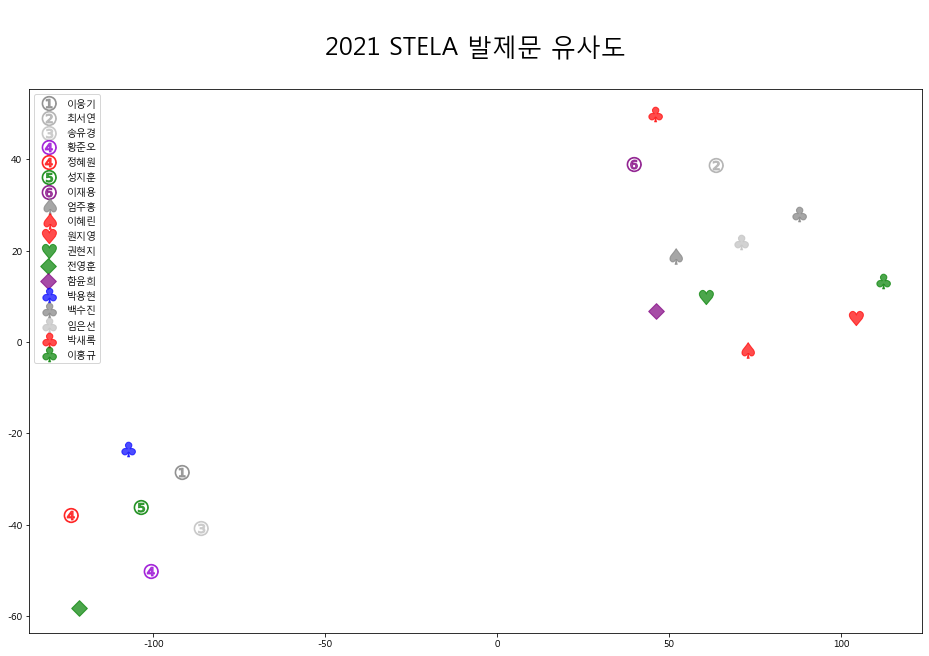

In [57]:
marker_dict = {
    '이웅기':['$①$', 'gray'],
    '최서연':['$②$', 'darkgrey'],
    '송유경':['$③$', 'silver'],
    '황준오':['$④$', 'darkviolet'],
    '정혜원':['$④$', 'red'],
    '성지훈':['$⑤$', 'green'],
    '이재용':['$⑥$', 'purple'],

    '엄주홍':['$\spadesuit$', 'gray'],
    '이혜린':['$\spadesuit$', 'red'],

    '원지영':['$\u2665$', 'red'], # -> 속이 찬 하트의 유니코드
    '권현지':['$\u2665$', 'green'],

    '전영훈':['$\u25C6$', 'green'],  # -> 속이 찬 다이아몬드의 유니코드
    '함윤희':['$\u25C6$', 'purple'],

    '박용현':['$\clubsuit$', 'blue'],
    '백수진':['$\clubsuit$', 'gray'],
    '임은선':['$\clubsuit$', 'silver'],
    '박새록':['$\clubsuit$', 'red'],
    '이홍규':['$\clubsuit$', 'green'],
}

fig = plt.figure(figsize=(16,10))
for idx, people in enumerate(marker_dict.keys()):
    scatter = plt.scatter(
        xs[idx], ys[idx], # plot x & y
        label = marker_dict[people],
        marker = marker_dict[people][0],
        c= marker_dict[people][1], # color
        s= 250, alpha=0.7
    )

# legend = plt.legend(
#             # handles = scatter.legend_elements()[0],  # 범례 가져오기
#             fontsize=15,   # 범례 텍스트 크기
#             # labels=set(df_EDU_curriculum['category']),  # 라벨 텍스트
#             markerscale=1.,  # 범례 마커 크기
#             bbox_to_anchor=(1.01, 1.015), loc='upper left'  # 범례 위치 - 그래프 밖 우측 상단
#              )

plt.title('\n2021 STELA 발제문 유사도\n', fontsize=25)
plt.legend(labels= marker_dict.keys(),
            # loc = 'upper right'
            loc = 'best'
            )
plt.show()

In [77]:
cleaned_CORPUS = {}
for k, v in zip(res.keys(), CORPUS):
    cleaned_CORPUS[k] = v

def people_wordcount(people, # 사람
                    stop_word, # 불용어
                    limit_upper = [False, 0.1], # 빈도 상위 10%는 지움
                    topN = 10, # 빈도 상위 10개 봄
                    ):
    global cleaned_CORPUS

    res = {}
    for word in tqdm(tagger.nouns(cleaned_CORPUS[people]), desc='>>> word count proceeding'):
        if word in stop_word.split(): continue
        else:
            if word not in res.keys():
                if re.match('[^ㄱ-ㅎ가-힣]', word): continue
                else: res[word] = 1
            else: res[word] += 1
    

    sorted_dict = sorted(res.items(), key=lambda x: x[1], reverse=True)
    if limit_upper[0] == True: sorted_dict = sorted_dict[round(len(sorted_dict)*limit_upper[1]):]
    else: pass


    return sorted_dict

hun = people_wordcount(people='성지훈 \xad', 
                stop_word='수 것 그 있는 사이의 이를 등 있음')
hun

>>> word count proceeding: 100%|██████████| 3821/3821 [00:00<00:00, 534250.14it/s]


[('학습', 95),
 ('분석', 71),
 ('데이터', 44),
 ('사용', 42),
 ('학생', 38),
 ('연구', 35),
 ('개인', 34),
 ('지식', 31),
 ('단어', 31),
 ('전문가', 29),
 ('조직', 28),
 ('사람', 24),
 ('네트워크', 24),
 ('방법', 23),
 ('교육', 22),
 ('필요', 21),
 ('채점', 20),
 ('의미', 20),
 ('활용', 20),
 ('이론', 20),
 ('기술', 19),
 ('관계', 18),
 ('공유', 18),
 ('업무', 18),
 ('언어', 17),
 ('때', 16),
 ('기반', 16),
 ('번', 16),
 ('교사', 15),
 ('처리', 15),
 ('사이', 15),
 ('전문', 15),
 ('개발', 15),
 ('과정', 15),
 ('경험', 15),
 ('간', 15),
 ('유형', 14),
 ('정보', 14),
 ('가능', 14),
 ('인간', 14),
 ('주제', 14),
 ('내', 14),
 ('자료', 13),
 ('중요', 13),
 ('자연어', 13),
 ('연결', 13),
 ('이해', 13),
 ('결과', 13),
 ('자동', 12),
 ('개', 12),
 ('수행', 12),
 ('발화', 12),
 ('예시', 12),
 ('이', 12),
 ('노드', 12),
 ('모델링', 11),
 ('보조', 11),
 ('구조', 11),
 ('수준', 11),
 ('대화', 11),
 ('특정', 11),
 ('점', 11),
 ('내용', 11),
 ('질문', 11),
 ('키워드', 11),
 ('해석', 10),
 ('모델', 10),
 ('행동', 10),
 ('행위', 10),
 ('평가', 10),
 ('맥락', 10),
 ('말', 10),
 ('방식', 10),
 ('위치', 10),
 ('문화', 10),
 ('자신', 10),
 ('그것', 9),
 

In [79]:
unggi = people_wordcount(people='UNGGI LEE', 
                stop_word='수 것 그 있는 사이의 이를 등을 있음')
unggi

>>> word count proceeding: 100%|██████████| 4511/4511 [00:00<00:00, 590509.20it/s]


[('학습', 134),
 ('데이터', 115),
 ('분석', 102),
 ('사용', 55),
 ('교수', 54),
 ('교육', 52),
 ('연구', 52),
 ('교사', 47),
 ('학생', 45),
 ('모델', 44),
 ('측정', 42),
 ('필요', 40),
 ('수업', 39),
 ('평가', 35),
 ('활용', 33),
 ('기반', 33),
 ('방법', 32),
 ('때', 31),
 ('과정', 30),
 ('질문', 27),
 ('등', 26),
 ('결과', 25),
 ('제공', 25),
 ('도구', 23),
 ('이론', 22),
 ('설계', 22),
 ('효과', 22),
 ('이해', 20),
 ('개념', 20),
 ('문제', 20),
 ('상황', 19),
 ('논의', 19),
 ('특정', 18),
 ('지식', 18),
 ('시간', 18),
 ('통계', 18),
 ('강의', 18),
 ('참여', 17),
 ('확인', 17),
 ('교육학', 17),
 ('가능', 17),
 ('개발', 17),
 ('생각', 17),
 ('설명', 17),
 ('피드백', 16),
 ('변수', 16),
 ('지원', 15),
 ('구성', 15),
 ('집중', 15),
 ('잠재', 15),
 ('정보', 15),
 ('교수자', 14),
 ('인식', 14),
 ('관점', 14),
 ('수집', 14),
 ('대시보드', 14),
 ('실제', 13),
 ('대상', 13),
 ('시험', 13),
 ('경험', 13),
 ('반응', 13),
 ('활동', 13),
 ('중요', 12),
 ('기술', 12),
 ('행동', 12),
 ('관련', 12),
 ('중', 12),
 ('응답', 12),
 ('신뢰', 12),
 ('관찰', 12),
 ('개인', 12),
 ('내용', 12),
 ('영훈', 12),
 ('고려', 11),
 ('사람', 11),
 ('가정', 11),
 ('무엇'

In [81]:
YH = people_wordcount(people='전영훈', 
                stop_word='수 것 그 있는 사이의 이를 등을 있음')
YH

>>> word count proceeding: 100%|██████████| 726/726 [00:00<00:00, 420124.82it/s]


[('학생', 23),
 ('정보', 22),
 ('데이터', 19),
 ('개인', 14),
 ('문제', 12),
 ('가능', 12),
 ('학습', 12),
 ('웅기', 9),
 ('채점', 8),
 ('연구', 7),
 ('해석', 7),
 ('부경', 6),
 ('등', 6),
 ('교사', 6),
 ('생각', 6),
 ('관리', 5),
 ('활용', 5),
 ('관심', 5),
 ('차원', 5),
 ('지훈', 4),
 ('주제', 4),
 ('수집', 4),
 ('분석', 4),
 ('사교육', 4),
 ('보호', 4),
 ('조항', 4),
 ('모델', 4),
 ('게', 3),
 ('시간', 3),
 ('중', 3),
 ('때', 3),
 ('측정', 3),
 ('과정', 3),
 ('살', 3),
 ('필요', 3),
 ('공교육', 3),
 ('사람', 3),
 ('접근', 3),
 ('제한', 3),
 ('방향', 3),
 ('부분', 3),
 ('해결책', 3),
 ('책임', 3),
 ('잘못', 3),
 ('알고리즘', 3),
 ('공간', 3),
 ('설명', 3),
 ('용현', 3),
 ('성능', 3),
 ('결합', 3),
 ('말', 2),
 ('개별', 2),
 ('윤리', 2),
 ('듯', 2),
 ('뇌파', 2),
 ('상호', 2),
 ('작용', 2),
 ('도입', 2),
 ('개발', 2),
 ('하나', 2),
 ('공개', 2),
 ('처리', 2),
 ('문서', 2),
 ('발전', 2),
 ('업체', 2),
 ('내용', 2),
 ('상황', 2),
 ('반영', 2),
 ('공유', 2),
 ('사기업', 2),
 ('어디', 2),
 ('개발자', 2),
 ('제공', 2),
 ('윈', 2),
 ('마케팅', 2),
 ('축적', 2),
 ('학부모', 2),
 ('교육', 2),
 ('중요', 2),
 ('수정', 2),
 ('영향', 2),
 ('이야기', 2),
 ('재용'

In [84]:
import plotly.express as px

def draw_bar(people_wdcount_ls, # 사람 워드카운트
            people_name, # 사람이름
            ):

    for_fig = {'word': [], 'count': []}
    for idx, dt in enumerate(people_wdcount_ls):
        if idx > 10: continue
        else:
            for_fig['word'].append(dt[0])
            for_fig['count'].append(dt[1])

    fig = px.bar(for_fig, x='word', y='count', title=f'{people_name} 사용단어 빈도')
    fig.show()

draw_bar(hun, people_name='성지훈')
draw_bar(unggi, people_name='이웅기')
draw_bar(YH, people_name='전영훈')